In [2]:
import numpy as np


# 1) Perceptron
* threshold logical unit or linear threshold logical unit
* each input has weight 
* weighted sum is computed and then passed to step function
* perceptron with single output => binary classification
* training : finding right weights for the function
* they are unable to learn complex patterns as they have single decision boundry(just like logistic regression)


In [3]:
#Perceptron
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])
y_pred

array([0])

# MLP : multi layer perceptrons and back propogation
* 1 input layer, many hidden layers, 1 output layer
* lower layers : closer to input layers, upper layers: closer to output layers
* Back propogatio training algo:
  1. handles one mini-batch at a time : epoch
 2. each batch is passed to input layer and then to hidden layers => results computed => again passed to next layer : **Forward Pass**; **Result are stored for future**: used during backward pass
 3. Network output error is measured ( using loss function desired and actual output are compared )
 4. Applys chain rule to find contribution of error and uses results to tweak the weights of original equations.

### Logistic function : sigmoid ( for binary)
Step function contains only flat values, using sigmoid we have graidents also.




* **Multilabel binary classification**  
  1. (spam or not spam), (urgent or not urgent) : different binary labels
  2. **Logistic activation** function with 1 neuron for each label
  3. output probablities need not be sum upto 1
* **Multiclass classification**
  1. many classes present for same label
  2. **softmax activation** function with 1 neuron for each class.
  3. add of probablities is 1 and all are between 0 and 1

  *we are prediction probablity distribution*


# Keras and TensorFlow
* high level deep learning API that allows to build , train, evaluate and execute all forms of neural networks.
* it relies on computational backend to perform heavy computations
* Library : TensorFlow ( as backend)
* PyTorch ( facebook's library for deep learning)
*  

In [4]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [5]:
from tensorflow import keras
keras.__version__

'2.9.0'

# Image Classifier using Sequential API

In [6]:
# load fashion MNIST

fashion_mnist = keras.datasets.fashion_mnist


In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
# 2) create validation set
# we will train using GD so we should scale input features(dividing by 255.0)
x_valid, x_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
# class names
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [12]:
class_names[y_train[0]]

'Coat'

# Creating Model using Sequential API
1. Sequential API: It is simplest kind of Keras model for neural networks that are composed of single stack of layers connected sequentially.
2. Flatten Layer: it converts each input into 1D array ie reshapes input.
      * we need to specify input shape as it is very first layer without batch_size
      * simple preprocessing step
3. Dense Layer : manages own weight
      * contains all connection weights between neurons and their inputs
      * also manages vector bias
      * keeps weighted sum

In [13]:
# HIDDEN LAYERS =2 

# 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Dense layers have a lot of parameters: 1st hidden layer has 784 * 300 connection weights + 300 bias terms => this gives 235500 parameters

In [15]:
# getting model layers
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
weights,biases = hidden1.get_weights()

Random weights assigned to the hidden1 and biases are initiLIZED to 0. 

In [18]:
weights

array([[ 0.02670767,  0.0411258 ,  0.00581606, ...,  0.00547947,
         0.04621855,  0.04993323],
       [ 0.05447663,  0.04348813, -0.0082235 , ..., -0.03247423,
         0.02804069, -0.042455  ],
       [ 0.01498049, -0.03854303, -0.01933719, ..., -0.03973505,
         0.02886321, -0.04495928],
       ...,
       [ 0.03371145,  0.03889795, -0.01030625, ...,  0.0375758 ,
        -0.01343309,  0.01312268],
       [-0.03463593, -0.00516649,  0.05153416, ...,  0.02523927,
         0.0073425 ,  0.03712165],
       [ 0.00502326, -0.03334676,  0.01302418, ...,  0.03866699,
         0.05014784, -0.00498413]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Compiling a model

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

* sparse categorical  cross entropy : we use this loss because we have sparse labels. and classes are exclusive.
* sgd means we will train the model using simple stochastic graient descent 
* accuracy means we are measuring the accuracy during training and evaluation

# Training and evaluating the model

In [23]:
history = model.fit(x_train,y_train, epochs =10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7257 - accuracy: 0.7588 - val_loss: 0.4966 - val_accuracy: 0.8376
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4897 - accuracy: 0.8293 - val_loss: 0.4589 - val_accuracy: 0.8432
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4458 - accuracy: 0.8441 - val_loss: 0.4199 - val_accuracy: 0.8594
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4183 - accuracy: 0.8534 - val_loss: 0.3901 - val_accuracy: 0.8684
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3973 - accuracy: 0.8609 - val_loss: 0.3933 - val_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3818 - accuracy: 0.8651 - val_loss: 0.3837 - val_accuracy: 0.8700
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3685 - accuracy: 0.8697 - val_loss: 0.3640 - val_accuracy:

* accuracy = train accuracy
* val_accuracy = accuracy on validation 

if train accuracy is much better than val acc than we can say its overfitting

In [26]:
import matplotlib.pyplot as plt
import pandas as pd


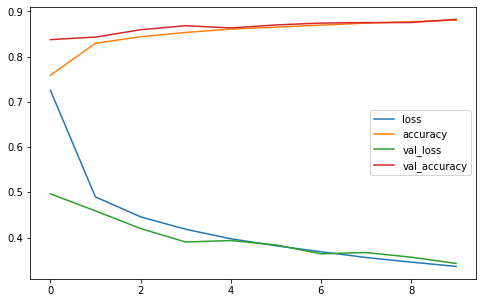

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))

we can see that the validation loss os still going down, so we can say that it has not converged yet.
* We can now do more training, or change hyperparameters such as increase learning rate, or increase no of layers, or no of neurons in one layer, or changing batch sizes.
* Altering these can help us in reaching lowest validation loss, and thus obtaing most precise validation accuracy.

# Evaluating the model

once we are satisfied with validation accuracy, we can use the model to perform test on it.

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 72.2551 - accuracy: 0.8189


[72.2551040649414, 0.8188999891281128]

# using model to predict values

In [29]:
X_new = X_test[:3]
y_prob = model.predict(X_new)

1/1 [==============================] - 0s 100ms/step


In [30]:
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

we can see we have got probablities for 3 items as of blonging to class 9, 3 and 2 is 1.